In [ ]:
import pandas as pd

df = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/YP_data_face_detected_v2.csv"
)

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import os

# 데이터 로드
file_path = "C:/Users/honjo/profile_level_prediction/data/YP_data_face_detected_v2.csv"  # 여기서 파일 경로를 지정해주세요
df = pd.read_csv(file_path)

# Fold 개수 설정
n_splits = 5

# StratifiedKFold를 사용하여 cs_rank와 sex를 고려한 k-fold 나누기
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 각 fold를 저장할 폴더 설정
output_folder = "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC/"
os.makedirs(output_folder, exist_ok=True)

# cs_rank와 sex를 합친 새로운 칼럼 생성 (이를 기준으로 stratified split)
df["group"] = df["cs_rank"] + "-" + df["sex"]

# 각 fold에 대한 인덱스 나누기 및 저장
for fold, (train_idx, valid_idx) in enumerate(skf.split(df, df["group"])):
    # Train 및 Validation 데이터 나누기
    train_df = df.iloc[train_idx]
    valid_df = df.iloc[valid_idx]

    # Validation 데이터에서 A-M, A-F, C-M, C-F 각각 100개씩 추출
    valid_a_m = valid_df[
        (valid_df["cs_rank"] == "A") & (valid_df["sex"] == "M")
    ].sample(n=100, random_state=42)
    valid_a_f = valid_df[
        (valid_df["cs_rank"] == "A") & (valid_df["sex"] == "F")
    ].sample(n=100, random_state=42)
    valid_c_m = valid_df[
        (valid_df["cs_rank"] == "C") & (valid_df["sex"] == "M")
    ].sample(n=100, random_state=42)
    valid_c_f = valid_df[
        (valid_df["cs_rank"] == "C") & (valid_df["sex"] == "F")
    ].sample(n=100, random_state=42)

    # Validation 데이터 합치기
    valid_subset = pd.concat([valid_a_m, valid_a_f, valid_c_m, valid_c_f])

    # Train 데이터에서 validation subset에 포함된 데이터를 제외한 나머지로 다시 구성
    train_subset = train_df[~train_df.index.isin(valid_subset.index)]

    # 저장할 파일 이름 지정
    train_file = f"{output_folder}train_fold_{fold+1}.csv"
    valid_file = f"{output_folder}valid_fold_{fold+1}.csv"

    # CSV 파일로 저장
    train_subset.to_csv(train_file, index=False)
    valid_subset.to_csv(valid_file, index=False)

    print(f"Fold {fold+1} saved: {train_file} and {valid_file}")

In [ ]:
# 파이프 라인 3-CLASS 데이터 생성 코드

# 일반 승인 이미지 데이터
import pandas as pd

df_train = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC/train_fold_1.csv"
)
df_valid = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC/valid_fold_1.csv"
)

# df_B_train = pd.read_csv('C:/Users/honjo/profile_level_prediction/data/5_fold_4class/YP_data_train_4class_1.csv')
# df_B_valid = pd.read_csv('C:/Users/honjo/profile_level_prediction/data/5_fold_4class/YP_data_train_4class_1.csv')
# df_B = pd.concat([df_B_train, df_B_valid])
# df_B = df_B[df_B['cs_rank'] == 'B']

df_train_B = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_4class/YP_data_train_4class_1.csv"
)
df_valid_B = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_4class/YP_data_valid_4class_1.csv"
)
df_B = pd.concat([df_train_B, df_valid_B])
df_B = df_B[df_B["cs_rank"] == "B"]

df_normal = pd.concat([df_train, df_valid, df_B])

df_normal = df_normal[["local_image", "cs_rank"]]
df_normal["cs_rank"] = "normal"

df_normal

In [ ]:
df_NLP = pd.read_csv("C:/Users/honjo/profile_level_prediction/data/NLP_data.csv")
df_NLP_A = df_NLP[df_NLP["profile_level"] == "A"]
df_NLP_B = df_NLP[df_NLP["profile_level"] == "B"]
df_NLP_C = df_NLP[df_NLP["profile_level"] == "C"]

df_NLP_A_sample = df_NLP_A.sample(n=1000, random_state=42)
df_NLP_B_sample = df_NLP_B.sample(n=1000, random_state=42)
df_NLP_C_sample = df_NLP_C.sample(n=1000, random_state=42)

df_NLP_sample = pd.concat([df_NLP_A_sample, df_NLP_B_sample, df_NLP_C_sample])
df_NLP_sample.rename(
    {"local_image": "new_image_path", "profile_level": "cs_rank"}, axis=1, inplace=True
)
df_NLP_sample["cs_rank"] = "normal"

In [ ]:
# 기타 승인 이미지 데이터
df_null = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/NLP_YP_3class_60000_train.csv"
)
df_null = df_null[df_null["profile_level"] == "-"].sample(n=2500, random_state=42)
df_null.rename({"profile_level": "cs_rank"}, axis=1, inplace=True)
df_null["cs_rank"] = "-"
df_null = df_null[["local_image", "cs_rank"]]

df_null

In [21]:
# 비승인 이미지 데이터
import os
from datasets import load_dataset
from PIL import Image

# Step 1: 데이터셋 로드
ds = load_dataset("amaye15/NSFW")

# Step 2: 이미지 저장 디렉터리 설정
output_dir = "C:/Users/honjo/profile_level_prediction/data/nsfw_images_new"
os.makedirs(output_dir, exist_ok=True)

# Step 3: 이미지 파일로 저장
image_paths = []
labels = []

ds_train = ds["train"].select(range(22911, len(ds["train"])))
print(len(ds_train))

for i, item in enumerate(ds_train, 22911):  # 예를 들어 "train" split 사용
    img = item["pixel_values"]  # PIL 이미지 객체
    label = item["label"]

    # 이미지 파일 저장 경로 설정
    image_filename = f"nsfw_image_{i}.png"
    image_path = os.path.join(output_dir, image_filename)

    # 이미지 파일 저장
    img.save(image_path)

    # 경로와 레이블 저장
    image_paths.append(image_path)
    labels.append(label)

31105


KeyboardInterrupt: 

In [ ]:
# Step 4: DataFrame 생성 및 CSV로 저장
import pandas as pd

df = pd.DataFrame({"local_image": image_paths, "cs_rank": ["nsfw"] * len(image_paths)})

# CSV 파일로 저장
df.to_csv("C:/Users/honjo/profile_level_prediction/data/nsfw_dataset.csv", index=False)

In [ ]:
import os
import pandas as pd

# Step 1: 이미지 저장 디렉터리 설정
output_dir = "C:/Users/honjo/profile_level_prediction/data/nsfw_images_cleaned"
image_files = sorted(os.listdir(output_dir))  # 파일 이름을 정렬하여 순서대로 가져오기

# Step 2: 이미지 경로와 레이블 생성
image_paths = [
    os.path.join(output_dir, f"nsfw_image_{i}.png") for i in range(len(image_files))
]
labels = ["nsfw"] * len(image_files)  # 모든 레이블을 'nsfw'로 설정

# Step 3: DataFrame 생성
df_nsfw = pd.DataFrame({"local_image": image_paths, "cs_rank": labels})

# Step 4: DataFrame을 확인하고 필요시 CSV로 저장
# df.to_csv("C:/Users/honjo/profile_level_prediction/data/nsfw_dataset.csv", index=False)  # 필요시 CSV 저장
# df_nsfw = df_nsfw.sample(n=1000, random_state=42)

df_nsfw

In [ ]:
df = pd.concat([df_normal, df_null, df_nsfw], ignore_index=True)
df

In [ ]:
df.to_csv(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_3n/3_class_normal_null_nsfw_7500.csv",
    index=False,
)

In [ ]:
# 데이터 로드
file_path = "C:/Users/honjo/profile_level_prediction/data/5_fold_3n/3_class_normal_null_nsfw_7500.csv"
data = pd.read_csv(file_path)

# NaN 값 확인 및 제거 (필요에 따라 선택)
# NaN 값이 있는 행을 제거합니다. 필요에 따라 NaN 값을 다른 값으로 채울 수도 있습니다.
# data = data.dropna(subset=['cs_rank'])

# Stratified KFold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 각 폴드에 대해 train, valid 나누기
for fold, (train_index, valid_index) in enumerate(
    skf.split(data, data["cs_rank"]), start=1
):
    train_fold = data.iloc[train_index]
    valid_fold = data.iloc[valid_index]

    # 파일 저장
    train_file_path = (
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_3n/train_fold_{fold}.csv"
    )
    valid_file_path = (
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_3n/valid_fold_{fold}.csv"
    )

    train_fold.to_csv(train_file_path, index=False)
    valid_fold.to_csv(valid_file_path, index=False)

In [ ]:
df = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_3n/train_fold_1.csv"
)
df["cs_rank"].value_counts()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# CSV 파일 경로
csv_file_path = "data/NLP_YP_3class_60000_train.csv"

# CSV 파일 읽기
df = pd.read_csv(csv_file_path)

# 클래스별로 고유 값 확인
unique_classes = ["-"]
print("Unique classes:", unique_classes)


# 각 클래스의 이미지를 시각화하는 함수
def display_images_for_class(dataframe, class_name, num_images=3):
    class_df = dataframe[dataframe["profile_level"] == class_name]
    image_paths = class_df["local_image"].sample(3).tolist()

    # 이미지 시각화
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle(f"Class: {class_name}", fontsize=16)

    for i, path in enumerate(image_paths):
        try:
            img = Image.open(path).convert("RGB")
            axes[i].imshow(img)
            axes[i].set_title(f"Image {i + 1}")
            axes[i].axis("off")
        except Exception as e:
            print(f"Error opening image {path}: {e}")
            axes[i].set_title(f"Error {i + 1}")
            axes[i].axis("off")

    plt.show()


# 각 클래스에 대해 이미지를 시각화
for class_name in unique_classes:
    display_images_for_class(df, class_name, num_images=3)

In [ ]:
input_file = "C:/Users/honjo/profile_level_prediction/SCUT-FBP5500_v2/train_test_files/All_labels.txt"

with open(input_file, "r") as file:
    lines = file.readlines()

A = 0
C = 0
# 각 줄에서 파일명과 점수를 추출하고, 새로운 데이터 리스트를 작성
for line in lines:
    filename, score = line.split()
    score = float(score)

    # cs_rank 설정 (4.06 이상은 'A', 2.17 이하는 'C')
    if score >= 3.43:
        A += 1
    elif score <= 2.54:
        C += 1
    else:
        continue  # 2.17 ~ 4.06 사이의 점수는 제외

print(f"A: {A}개, C: {C}개")

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# 데이터를 읽어오기 위한 경로 설정
input_file = "C:/Users/honjo/profile_level_prediction/SCUT-FBP5500_v2/train_test_files/All_labels.txt"
image_path_base = "C:/Users/honjo/profile_level_prediction/SCUT-FBP5500_v2/Images/"

# 데이터를 리스트로 저장할 변수
data = []

# 파일을 불러오기
with open(input_file, "r") as file:
    lines = file.readlines()

# 각 줄에서 파일명과 점수를 추출하고, 새로운 데이터 리스트를 작성
for line in lines:
    filename, score = line.split()
    score = float(score)

    # cs_rank 설정 (4.06 이상은 'A', 2.17 이하는 'C')
    if score >= 4.06:
        cs_rank = "A"
    elif score <= 2.17:
        cs_rank = "C"
    else:
        continue  # 2.17 ~ 4.06 사이의 점수는 제외

    # new_image_path 설정
    new_image_path = f"{image_path_base}{filename}"

    # sex 설정 (파일명에 'M'이 있으면 'M', 'F'가 있으면 'F')
    if "M" in filename:
        sex = "M"
    elif "F" in filename:
        sex = "F"
    else:
        continue  # M이나 F가 없는 파일은 제외

    # 데이터 추가
    data.append([cs_rank, new_image_path, sex])

# DataFrame으로 변환
df = pd.DataFrame(data, columns=["cs_rank", "new_image_path", "sex"])

# cs_rank와 sex를 결합한 새로운 열을 생성 (stratify 기준)
df["stratify_label"] = df["cs_rank"] + "_" + df["sex"]

# StratifiedKFold로 5개로 나눠서 비율 유지 (cs_rank와 sex 비율 동시에 유지)
skf = StratifiedKFold(n_splits=5)

# 각 fold에 대해 train, valid 파일을 생성
for fold, (train_idx, valid_idx) in enumerate(skf.split(df, df["stratify_label"]), 1):
    train_df = df.iloc[train_idx].drop(columns=["stratify_label"])
    valid_df = df.iloc[valid_idx].drop(columns=["stratify_label"])

    # CSV 파일로 저장
    os.makedirs("./data/FBP", exist_ok=True)
    train_df.to_csv(f"./data/FBP/train_fold_{fold}.csv", index=False)
    valid_df.to_csv(f"./data/FBP/valid_fold_{fold}.csv", index=False)

print("5-fold CSV 파일 생성 완료")

In [ ]:
import pandas as pd

a = pd.read_csv("C:/Users/honjo/profile_level_prediction/data/FBP/train_fold_3.csv")

In [ ]:
a.groupby("sex").size()

In [ ]:
a.groupby("cs_rank").size()

In [ ]:
import os
import pandas as pd

# 두 디렉토리 경로 설정
dir1 = "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC"
dir2 = "C:/Users/honjo/profile_level_prediction/data/FBP"
output_dir = "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_FBP_AC"  # 결과 파일을 저장할 디렉토리 (여기서 파일명 변경)

os.makedirs(output_dir, exist_ok=True)

# 각 fold의 train 및 validation 파일 이름들
folds = range(1, 6)
file_types = ["train", "valid"]

for fold in folds:
    for file_type in file_types:
        # 파일 이름 정의
        file_name = f"{file_type}_fold_{fold}.csv"

        # 두 디렉토리에서 파일 불러오기
        file_path1 = os.path.join(dir1, file_name)
        file_path2 = os.path.join(dir2, file_name)

        # 두 파일을 DataFrame으로 읽어오기 (필요한 열만 선택)
        df1 = pd.read_csv(file_path1, usecols=["cs_rank", "sex", "new_image_path"])
        df2 = pd.read_csv(file_path2, usecols=["cs_rank", "sex", "new_image_path"])

        # 두 DataFrame을 합치기
        merged_df = pd.concat([df1, df2])

        # 새로운 파일명 정의
        output_file_name = f"{file_type}_fold_{fold}.csv"
        output_file_path = os.path.join(output_dir, output_file_name)

        # 새로운 파일로 저장
        merged_df.to_csv(output_file_path, index=False)

print("CSV 파일 합치기 및 저장 완료.")

In [ ]:
import pandas as pd
import os

for i in range(1, 6):
    df = pd.read_csv(
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_3class_except_B/YP_data_train_3class_except_B_{i}.csv"
    )
    df = df[df["cs_rank"] != "-"]
    os.makedirs(
        "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_original",
        exist_ok=True,
    )
    df.to_csv(
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_2class_original/train_fold_{i}.csv",
        index=False,
    )

for i in range(1, 6):
    df = pd.read_csv(
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_3class_except_B/YP_data_valid_3class_except_B_{i}.csv"
    )
    df = df[df["cs_rank"] != "-"]
    os.makedirs(
        "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_original",
        exist_ok=True,
    )
    df.to_csv(
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_2class_original/valid_fold_{i}.csv",
        index=False,
    )

In [ ]:
import pandas as pd
import os

# 새로운 경로를 정의
new_path = (
    r"C:\Users\honjo\profile_level_prediction\data\face_detected_images\2class_AC"
)


def update_image_path(df, column_name="local_image"):
    # 기존 경로에서 파일 이름만 추출하여 새로운 경로와 결합
    df[column_name] = df[column_name].apply(
        lambda x: os.path.join(new_path, os.path.basename(x))
    )
    return df


# 학습 데이터에 대해 경로 변경 수행
for i in range(1, 6):
    df = pd.read_csv(
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_2class_original/train_fold_{i}.csv"
    )
    df = update_image_path(df, column_name="local_image")
    df.to_csv(
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_2class_original/train_fold_{i}.csv",
        index=False,
    )

# 검증 데이터에 대해 경로 변경 수행
for i in range(1, 6):
    df = pd.read_csv(
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_2class_original/valid_fold_{i}.csv"
    )
    df = update_image_path(df, column_name="local_image")
    df.to_csv(
        f"C:/Users/honjo/profile_level_prediction/data/5_fold_2class_original/valid_fold_{i}.csv",
        index=False,
    )

In [ ]:
import pandas as pd

df = pd.read_csv("ypdata_v2.csv")
df = df[["local_image", "cs_rank", "sex"]]
df["cs_rank"].value_counts()

In [56]:
import pandas as pd

# CSV 파일을 불러옵니다
df = pd.read_csv("ypdata_v2.csv")

df["original_cs_rank"] = df["cs_rank"]
# 필요한 열만 선택합니다
df = df[["local_image", "cs_rank", "sex", "original_cs_rank"]]

# 'A', 'B', 'C' 각각 1,000건씩 샘플링합니다
df_a = df[df["cs_rank"] == "A"].sample(n=1000, random_state=42)
df_b = df[df["cs_rank"] == "B"].sample(n=1000, random_state=42)
df_c = df[df["cs_rank"] == "C"].sample(n=1000, random_state=42)

# 샘플링한 데이터프레임을 합칩니다
sampled_df = pd.concat([df_a, df_b, df_c])

# 결과를 CSV로 저장합니다
sampled_df["cs_rank"] = "normal"
sampled_df

C:\Users\honjo\AppData\Local\Temp\ipykernel_17912\1917548804.py:4: DtypeWarning: Columns (7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ypdata_v2.csv')


local_image cs_rank sex  \
49425   ./data/images/2021-02-26/e03636c9-89b2-4211-b9...  normal   F   
53140   ./data/images/2022-11-18/b17f5398-5325-4717-a9...  normal   F   
53295   ./data/images/2023-01-08/574eefea-fa63-4b4e-ba...  normal   F   
52166   ./data/images/2020-01-07/818871a0-ed55-46ae-a1...  normal   F   
10458   ./data/images/2022-04-26/3a842de1-6fc4-4cc7-93...  normal   M   
...                                                   ...     ...  ..   
122802  ./data/images/2019-11-14/447514b8-37cf-43f6-81...  normal   F   
73599   ./data/images/2020-10-29/35393258-886d-4156-96...  normal   M   
122434  ./data/images/2020-12-10/2608c498-def9-43fd-83...  normal   F   
122358  ./data/images/2024-01-06/c8c06237-8777-4eed-8a...  normal   F   
122368  ./data/images/2021-06-14/c7dc6348-974b-4791-92...  normal   F   

       original_cs_rank  
49425                 A  
53140                 A  
53295                 A  
52166                 A  
10458                 A  
...                 ...  
122802                C  
73599                 C  
122434                C  
122358                C  
122368                C  

[3000 rows x 4 columns]

In [3]:
# 기타 승인 이미지 데이터
df_null = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/NLP_YP_3class_60000_train.csv"
)
df_null = df_null[df_null["profile_level"] == "-"].sample(n=3000, random_state=42)
df_null.rename({"profile_level": "cs_rank"}, axis=1, inplace=True)
df_null["cs_rank"] = "-"
df_null = df_null[["local_image", "cs_rank"]]

df_null

local_image cs_rank
26234  ./data/images/2022-03-17/bc30c1d7-14cc-441f-bb...       -
13984  ./data/images/2024-01-16/224d269a-d854-417a-bb...       -
18289  ./data/images/2022-01-21/802668e8-ee89-499e-ac...       -
906    ./data/images/2022-06-10/1bd06ae4-ff0a-4626-b6...       -
24717  ./data/images/2021-07-20/148095c1-d10b-44bb-b1...       -
...                                                  ...     ...
23904  ./data/images/2020-02-13/86c9c0a4-0666-43c6-9b...       -
47814  ./data/images/2022-04-06/2b5b1236-479d-4cd8-a2...       -
4406   ./data/images/2023-01-09/0cb46510-6ddf-4126-b4...       -
37654  ./data/images/no_date/824df941-f23c-485f-8dfb-...       -
11075  ./data/images/2023-08-26/d161a3a7-afdf-4757-9d...       -

[3000 rows x 2 columns]

In [16]:
import os
import pandas as pd

# Step 1: 이미지 저장 디렉터리 설정
output_dir = "C:/Users/honjo/profile_level_prediction/data/normal_images_cleaned/A"
image_files = os.listdir(output_dir)  # 파일 이름을 정렬하여 순서대로 가져오기
print(image_files)
# Step 2: 이미지 경로와 레이블 생성
image_paths = [os.path.join(output_dir, i) for i in image_files]
labels = ["normal"] * len(image_files)
print(image_paths)
# Step 3: DataFrame 생성
df_A_cleaned = pd.DataFrame({"local_image": image_paths, "cs_rank": labels})

# Step 4: DataFrame을 확인하고 필요시 CSV로 저장
# df.to_csv("C:/Users/honjo/profile_level_prediction/data/nsfw_dataset.csv", index=False)  # 필요시 CSV 저장
# df_nsfw = df_nsfw.sample(n=3000, random_state=42)

output_dir = "C:/Users/honjo/profile_level_prediction/data/normal_images_cleaned/C"
image_files = os.listdir(output_dir)  # 파일 이름을 정렬하여 순서대로 가져오기
print(image_files)
# Step 2: 이미지 경로와 레이블 생성
image_paths = [os.path.join(output_dir, i) for i in image_files]
labels = ["normal"] * len(image_files)
print(image_paths)
# Step 3: DataFrame 생성
df_C_cleaned = pd.DataFrame({"local_image": image_paths, "cs_rank": labels})

df_normal_cleaned = pd.concat([df_A_cleaned, df_C_cleaned])
df_normal_cleaned

['0001c309-26ab-462e-914a-76d40756aa5b.jpeg', '0006466aff4d0d67c3285d90a5f23288.jpg', '000af41a-d36d-4726-a9af-ca1409c2ea5a.jpeg', '000b686b-36d7-4830-a800-fa2fd1ff9531.jpeg', '000cbaa1-4a47-4e9d-b4d4-783f5a7a8972.jpeg', '000dd434-4f4e-4d3b-9a70-f1cb502d6c7b.jpeg', '000e4051-4b0a-4f4e-8854-d000c7e9094d.jpeg', '000f7b0e-3129-444d-9273-e5b04de971af.jpeg', '00366784-81c8-4eb9-be77-6ba4f2581790.jpeg', '004d4068-2fdd-4f08-a2a6-52a2d6507447.jpeg', '004ec25a-08c2-4042-bee6-5f413900296d.jpeg', '006aa821-5d34-467b-8327-d4afb5a0324d.jpeg', '006b9ceb-7357-488e-b56e-ecc6007448cc.jpeg', '00a0dc06-ca8d-4318-bef8-328a874c1703.jpeg', '00a5b6d5-69d8-4ff7-bff8-c06c84e33ae9.jpeg', '00a61077-986b-4ae8-bc25-d07700b16d31.jpeg', '00a68087-d418-48ec-b1d7-0f579498be29.jpeg', '00a859ae-5cd3-4a9e-8dc5-ad86cb056501.jpeg', '00a87a15-7f8c-43ec-806d-0fff1558bd02.jpeg', '00aa1e23-8dcf-4175-9232-0feff999ee66.jpeg', '00ab37b1-255c-4094-be5a-80a11657dc6d.jpeg', '00adc84f-87a2-4c76-a351-4b38c43cfa08.jpeg', '00af6b7f-d3aa

local_image cs_rank
0     C:/Users/honjo/profile_level_prediction/data/n...  normal
1     C:/Users/honjo/profile_level_prediction/data/n...  normal
2     C:/Users/honjo/profile_level_prediction/data/n...  normal
3     C:/Users/honjo/profile_level_prediction/data/n...  normal
4     C:/Users/honjo/profile_level_prediction/data/n...  normal
...                                                 ...     ...
2823  C:/Users/honjo/profile_level_prediction/data/n...  normal
2824  C:/Users/honjo/profile_level_prediction/data/n...  normal
2825  C:/Users/honjo/profile_level_prediction/data/n...  normal
2826  C:/Users/honjo/profile_level_prediction/data/n...  normal
2827  C:/Users/honjo/profile_level_prediction/data/n...  normal

[5732 rows x 2 columns]

In [17]:
import os
import pandas as pd

# Step 1: 이미지 저장 디렉터리 설정
output_dir = "C:/Users/honjo/profile_level_prediction/data/null_images_cleaned"
image_files = os.listdir(output_dir)  # 파일 이름을 정렬하여 순서대로 가져오기
print(image_files)
# Step 2: 이미지 경로와 레이블 생성
image_paths = [os.path.join(output_dir, i) for i in image_files]
labels = ["-"] * len(image_files)  # 모든 레이블을 'nsfw'로 설정
print(image_paths)
# Step 3: DataFrame 생성
df_null_cleaned = pd.DataFrame({"local_image": image_paths, "cs_rank": labels})

# Step 4: DataFrame을 확인하고 필요시 CSV로 저장
# df.to_csv("C:/Users/honjo/profile_level_prediction/data/nsfw_dataset.csv", index=False)  # 필요시 CSV 저장
# df_nsfw = df_nsfw.sample(n=3000, random_state=42)

df_null_cleaned

['00005b1a-ba2f-4e95-bb2b-6c87bfeafb3b.jpeg', '0005d14c-2a4b-4178-8bea-61fd421d081d.jpeg', '0006af77-77eb-43db-8b36-5438efbf9044.jpeg', '000b2334-39fa-41ca-9e0b-a0f8d860a7b8.jpeg', '000b2a86-a561-45f1-a44c-7c33631cd71f.jpeg', '000f5407-d187-4950-b954-f7786057a5ce.jpeg', '001b4f1e-7b82-426c-9705-bab40f359f78.jpeg', '001b78f4-a711-4efe-a081-eb11bac21763.jpeg', '001eb973-e1b9-4c2a-a7a6-74d11863e168.jpeg', '00235766-c351-453a-9306-278e1f0662ea.jpeg', '002cfc4f-cce4-45f0-b43b-2fdbbf4e39a6.jpeg', '003229e3-b52b-4878-b8fd-7c1b453835db.jpeg', '003b8a82-9546-418d-95f7-41f7a4ab276b.jpeg', '003f4c47-3f0f-4444-a353-99f476f18b2c.jpeg', '004ebb10-d0e6-4d40-9d03-094e3022c91b.jpeg', '004ff0c4-5616-4bb2-976e-cfd32ac85019.jpeg', '005ff71b-b86e-450b-8257-f1b55f5111d7.jpeg', '00719000-50dd-45a3-ba7b-b44e762189cf.jpeg', '007eb98f-fec7-468a-a6ba-640490b6902c.jpeg', '0085f976-ce3b-4a18-aa94-eb6cb64c0834.jpeg', '0086be83-44e0-45db-adbe-e0da09fc170b.jpeg', '00877976-168d-4cd9-afd5-65d910175d4b.jpeg', '0093cd31

local_image cs_rank
0      C:/Users/honjo/profile_level_prediction/data/n...       -
1      C:/Users/honjo/profile_level_prediction/data/n...       -
2      C:/Users/honjo/profile_level_prediction/data/n...       -
3      C:/Users/honjo/profile_level_prediction/data/n...       -
4      C:/Users/honjo/profile_level_prediction/data/n...       -
...                                                  ...     ...
11083  C:/Users/honjo/profile_level_prediction/data/n...       -
11084  C:/Users/honjo/profile_level_prediction/data/n...       -
11085  C:/Users/honjo/profile_level_prediction/data/n...       -
11086  C:/Users/honjo/profile_level_prediction/data/n...       -
11087  C:/Users/honjo/profile_level_prediction/data/n...       -

[11088 rows x 2 columns]

In [18]:
import os
import pandas as pd

# Step 1: 이미지 저장 디렉터리 설정
output_dir = "C:/Users/honjo/profile_level_prediction/data/nsfw_images_cleaned"
image_files = os.listdir(output_dir)  # 파일 이름을 정렬하여 순서대로 가져오기
print(image_files)
# Step 2: 이미지 경로와 레이블 생성
image_paths = [os.path.join(output_dir, i) for i in image_files]
labels = ["nsfw"] * len(image_files)  # 모든 레이블을 'nsfw'로 설정
print(image_paths)
# Step 3: DataFrame 생성
df_nsfw = pd.DataFrame({"local_image": image_paths, "cs_rank": labels})

# Step 4: DataFrame을 확인하고 필요시 CSV로 저장
# df.to_csv("C:/Users/honjo/profile_level_prediction/data/nsfw_dataset.csv", index=False)  # 필요시 CSV 저장
# df_nsfw = df_nsfw.sample(n=3000, random_state=42)

df_nsfw

['nsfw_image_1000.png', 'nsfw_image_10002.png', 'nsfw_image_10004.png', 'nsfw_image_10006.png', 'nsfw_image_10010.png', 'nsfw_image_10017.png', 'nsfw_image_1002.png', 'nsfw_image_10020.png', 'nsfw_image_10021.png', 'nsfw_image_10024.png', 'nsfw_image_10026.png', 'nsfw_image_10029.png', 'nsfw_image_10030.png', 'nsfw_image_10031.png', 'nsfw_image_10034.png', 'nsfw_image_10036.png', 'nsfw_image_1004.png', 'nsfw_image_10040.png', 'nsfw_image_10042.png', 'nsfw_image_10045.png', 'nsfw_image_10051.png', 'nsfw_image_10052.png', 'nsfw_image_10055.png', 'nsfw_image_10057.png', 'nsfw_image_10058.png', 'nsfw_image_1006.png', 'nsfw_image_10063.png', 'nsfw_image_10064.png', 'nsfw_image_10065.png', 'nsfw_image_10066.png', 'nsfw_image_10067.png', 'nsfw_image_10068.png', 'nsfw_image_10073.png', 'nsfw_image_10074.png', 'nsfw_image_10076.png', 'nsfw_image_10079.png', 'nsfw_image_10081.png', 'nsfw_image_10089.png', 'nsfw_image_10090.png', 'nsfw_image_10092.png', 'nsfw_image_10093.png', 'nsfw_image_10096.p

local_image cs_rank
0     C:/Users/honjo/profile_level_prediction/data/n...    nsfw
1     C:/Users/honjo/profile_level_prediction/data/n...    nsfw
2     C:/Users/honjo/profile_level_prediction/data/n...    nsfw
3     C:/Users/honjo/profile_level_prediction/data/n...    nsfw
4     C:/Users/honjo/profile_level_prediction/data/n...    nsfw
...                                                 ...     ...
5995  C:/Users/honjo/profile_level_prediction/data/n...    nsfw
5996  C:/Users/honjo/profile_level_prediction/data/n...    nsfw
5997  C:/Users/honjo/profile_level_prediction/data/n...    nsfw
5998  C:/Users/honjo/profile_level_prediction/data/n...    nsfw
5999  C:/Users/honjo/profile_level_prediction/data/n...    nsfw

[6000 rows x 2 columns]

In [19]:
df_total = pd.concat([df_normal_cleaned, df_null_cleaned, df_nsfw], ignore_index=True)
df_total = df_total[["local_image", "cs_rank"]]
os.makedirs(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_3n_cleaned_null_maximization",
    exist_ok=True,
)
df_total.to_csv(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_3n_cleaned_null_maximization/total_cleaned.csv",
    index=False,
)

In [20]:
from sklearn.model_selection import StratifiedKFold

# 데이터 로드
file_path = "C:/Users/honjo/profile_level_prediction/data/5_fold_3n_cleaned_null_maximization/total_cleaned.csv"
data = pd.read_csv(file_path)

# NaN 값 확인 및 제거 (필요에 따라 선택)
# NaN 값이 있는 행을 제거합니다. 필요에 따라 NaN 값을 다른 값으로 채울 수도 있습니다.
# data = data.dropna(subset=['cs_rank'])

# Stratified KFold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 각 폴드에 대해 train, valid 나누기
for fold, (train_index, valid_index) in enumerate(
    skf.split(data, data["cs_rank"]), start=1
):
    train_fold = data.iloc[train_index]
    valid_fold = data.iloc[valid_index]

    # 파일 저장
    train_file_path = f"C:/Users/honjo/profile_level_prediction/data/5_fold_3n_cleaned_null_maximization/train_fold_{fold}.csv"
    valid_file_path = f"C:/Users/honjo/profile_level_prediction/data/5_fold_3n_cleaned_null_maximization/valid_fold_{fold}.csv"

    train_fold.to_csv(train_file_path, index=False)
    valid_fold.to_csv(valid_file_path, index=False)

In [1]:
import pandas as pd

df = pd.read_parquet("data/users.parquet")

In [3]:
df["image"][0]

'https://storage.googleapis.com/connecting-208115.appspot.com/profileImage/2020-08-03/2020-08-03%2012%3A07%3A13%3Ae6fc8351-5647-42ed-9fcf-9aac48396a09.jpeg'

In [17]:
from PIL import Image

img = Image.open(
    "https://storage.googleapis.com/connecting-208115.appspot.com/profileImage/2020-08-03/2020-08-03%2012%3A07%3A13%3Ae6fc8351-5647-42ed-9fcf-9aac48396a09.jpeg"
).convert("RGB")
img

OSError: [Errno 22] Invalid argument: 'C:\\Users\\honjo\\profile_level_prediction\\https:\\storage.googleapis.com\\connecting-208115.appspot.com\\profileImage\\2020-08-03\\2020-08-03%2012%3A07%3A13%3Ae6fc8351-5647-42ed-9fcf-9aac48396a09.jpeg'

In [9]:
df[df["image_path"] == df["image_path"].str.contains("8c985")]

Empty DataFrame
Columns: [id, alpha_code, sex, approval, profile_level, profile_rank, image, date_joined, image_host, image_path, is_invalid, valid_image_path, valid_image_url, local_image]
Index: []

In [ ]:
# import os
# import pandas as pd

# def process_folds(data_dir, output_dir):
#     # Create the output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)

#     # Process each fold
#     for fold in range(1, 6):
#         # Define paths for input files
#         train_file = os.path.join(data_dir, f"train_fold_{fold}.csv")
#         valid_file = os.path.join(data_dir, f"valid_fold_{fold}.csv")

#         # Define paths for output files
#         train_save_path = os.path.join(output_dir, f"train_fold_{fold}.csv")
#         valid_save_path = os.path.join(output_dir, f"valid_fold_{fold}.csv")

#         # Load training and validation data
#         train_df = pd.read_csv(train_file, header=0, names=["cs_rank", "sex", "new_image_path"])
#         valid_df = pd.read_csv(valid_file, header=0, names=["cs_rank", "sex", "new_image_path"])

#         # Separate SCUT-FBP5500 images (starting with 'C:/') from other images
#         scut_train_df = train_df[train_df["new_image_path"].str.startswith("C:/")]
#         non_scut_train_df = train_df[~train_df["new_image_path"].str.startswith("C:/")]

#         # Filter out SCUT-FBP5500 images from the validation data
#         valid_df_filtered = valid_df[~valid_df["new_image_path"].str.startswith("C:/")]
#         scut_valid_df = valid_df[valid_df["new_image_path"].str.startswith("C:/")]

#         # Combine SCUT-FBP5500 images with the non-SCUT training data for the final training set
#         updated_train_df = pd.concat([scut_train_df, non_scut_train_df, scut_valid_df], ignore_index=True)

#         # Save the updated training and validation data to the new output directory
#         updated_train_df.to_csv(train_save_path, index=False, header=True)
#         valid_df_filtered.to_csv(valid_save_path, index=False, header=True)

#         print(f"Processed fold {fold}:")
#         print(f"- Original training size: {len(train_df)}, Updated training size: {len(updated_train_df)}")
#         print(f"- Original validation size: {len(valid_df)}, Filtered validation size: {len(valid_df_filtered)}")
#         print(f"Saved updated training data to {train_save_path}")
#         print(f"Saved filtered validation data to {valid_save_path}")

# if __name__ == "__main__":
#     # Define the directory containing the original fold data
#     data_dir = 'data/5_fold_2class_FBP_AC'  # Update this path as needed
#     # Define the output directory for the processed fold data
#     output_dir = './data/5_fold_2class_without_fbp_val'

#     # Run the processing
#     process_folds(data_dir, output_dir)

In [ ]:
# import os
# import pandas as pd
# from sklearn.model_selection import train_test_split

# def process_folds(data_dir, output_dir, target_train_size=2400, target_val_size=600):
#     # Create the output directory if it doesn't exist
#     os.makedirs(output_dir, exist_ok=True)

#     # Process each fold
#     for fold in range(1, 6):
#         # Define paths for input files
#         train_file = os.path.join(data_dir, f"train_fold_{fold}.csv")
#         valid_file = os.path.join(data_dir, f"valid_fold_{fold}.csv")

#         # Define paths for output files
#         train_save_path = os.path.join(output_dir, f"train_fold_{fold}.csv")
#         valid_save_path = os.path.join(output_dir, f"valid_fold_{fold}.csv")

#         # Load training and validation data
#         train_df = pd.read_csv(train_file, header=0, names=["cs_rank", "sex", "new_image_path"])
#         valid_df = pd.read_csv(valid_file, header=0, names=["cs_rank", "sex", "new_image_path"])

#         # Separate SCUT-FBP5500 images (starting with 'C:/') from other images
#         scut_train_df = train_df[train_df["new_image_path"].str.startswith("C:/")]
#         non_scut_train_df = train_df[~train_df["new_image_path"].str.startswith("C:/")]

#         # Combine the non-SCUT training data with validation data for splitting
#         combined_df = pd.concat([non_scut_train_df, valid_df], ignore_index=True)

#         # Calculate the remaining non-SCUT data needed for training and validation
#         required_non_scut_train_size = target_train_size - len(scut_train_df)
#         required_non_scut_val_size = target_val_size

#         # Split the combined non-SCUT data to match the required sizes
#         non_scut_train_split, non_scut_val_split = train_test_split(
#             combined_df,
#             train_size=required_non_scut_train_size,
#             test_size=required_non_scut_val_size,
#             stratify=combined_df["cs_rank"],
#             random_state=42
#         )

#         # Combine SCUT-FBP5500 images with the selected non-SCUT data for the final training set
#         updated_train_df = pd.concat([scut_train_df, non_scut_train_split], ignore_index=True)

#         # Save the updated training and validation data to the new output directory
#         updated_train_df.to_csv(train_save_path, index=False, header=True)
#         non_scut_val_split.to_csv(valid_save_path, index=False, header=True)

#         print(f"Processed fold {fold}:")
#         print(f"- Original training size: {len(train_df)}, Updated training size: {len(updated_train_df)}")
#         print(f"- Original validation size: {len(valid_df)}, Final validation size: {len(non_scut_val_split)}")
#         print(f"Saved updated training data to {train_save_path}")
#         print(f"Saved filtered validation data to {valid_save_path}")

# if __name__ == "__main__":
#     # Define the directory containing the original fold data
#     data_dir = 'data/5_fold_2class_FBP_AC'  # Update this path as needed
#     # Define the output directory for the processed fold data
#     output_dir = './data/5_fold_2class_without_fbp_val'

#     # Run the processing
#     process_folds(data_dir, output_dir)

In [ ]:
import os
import pandas as pd
from IPython.display import display, clear_output, Markdown
from PIL import Image

# CSV 파일을 불러옵니다
df = pd.read_csv("ypdata_v2.csv")

# 필요한 열만 선택하고 'original_cs_rank'를 생성합니다
df["original_cs_rank"] = df["cs_rank"]
df = df[["local_image", "cs_rank", "sex", "original_cs_rank"]]

# 'A', 'B', 'C' 각각 1,000건씩 샘플링합니다
df_a = df[df["cs_rank"] == "A"].sample(n=1000, random_state=42)
df_b = df[df["cs_rank"] == "B"].sample(n=1000, random_state=42)
df_c = df[df["cs_rank"] == "C"].sample(n=1000, random_state=42)

# 샘플링한 데이터프레임을 합칩니다
sampled_df = pd.concat([df_a, df_b, df_c, df_null])

# 사용자가 특정 cs_rank를 필터링하여 보도록 함
selected_rank = "-"


filtered_df = sampled_df[sampled_df["cs_rank"] == selected_rank]
filtered_df = filtered_df.sample(50, random_state=50).reset_index(drop=True)  # 셔플링


for i in range(100):
    path = filtered_df["local_image"].iloc[i]
    original_rank = filtered_df["original_cs_rank"].iloc[i]

    try:
        img = Image.open(path)

        # 제목 출력
        display(Markdown(f"### Original CS Rank: {original_rank}"))
        display(img)

    except Exception as e:
        print(f"Error loading image {path}: {e}")

In [1]:
import os
import pandas as pd
from PIL import Image
from shutil import copy2

# CSV 파일을 불러옵니다
df = pd.read_csv("ypdata_v2.csv")

# 'A', 'B', 'C' 각각 1,000건씩 샘플링합니다
df_a = df[df["cs_rank"] == "A"]
df_b = df[df["cs_rank"] == "B"].sample(n=1000, random_state=42)
df_c = df[df["cs_rank"] == "C"]

# 샘플링한 데이터프레임을 합칩니다
df = pd.concat([df_a, df_c])
# 저장할 폴더 경로 설정
normal_dir_A = "./data/normal_images_original/A"
normal_dir_C = "./data/normal_images_original/C"


# 폴더가 없으면 생성
os.makedirs(normal_dir_A, exist_ok=True)
os.makedirs(normal_dir_C, exist_ok=True)


# 이미지 파일을 cs_rank 값에 따라 분류하여 저장
for idx, row in df.iterrows():
    cs_rank = row["cs_rank"]
    img_path = row["local_image"]

    # 이미지 저장 경로 설정
    if cs_rank == "A":
        save_dir = normal_dir_A
    elif cs_rank == "C":
        save_dir = normal_dir_C

    try:
        # 이미지 파일을 해당 폴더로 복사
        copy2(img_path, save_dir)

    except Exception as e:
        print(f"Error copying image {img_path}: {e}")

C:\Users\honjo\AppData\Local\Temp\ipykernel_16736\3579301368.py:7: DtypeWarning: Columns (7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ypdata_v2.csv')


In [27]:
import os
import pandas as pd
from shutil import copy2

# 데이터 불러오기 및 필터링
df_null = pd.read_csv("C:/Users/honjo/profile_level_prediction/data/NLP_data.csv")
df_null = df_null[df_null["profile_level"] == "-"].sample(n=500, random_state=500)
df_null.rename({"profile_level": "cs_rank"}, axis=1, inplace=True)
df_null["cs_rank"] = "-"
df_null = df_null[["local_image", "cs_rank"]]

# 저장할 폴더 경로 설정
null_dir = "./data/null_images_500"
cleaned_dir = "./data/null_images_cleaned_6000"

# 폴더가 없으면 생성
os.makedirs(null_dir, exist_ok=True)

# 이미 null_images_cleaned 폴더에 존재하는 파일 목록 불러오기
existing_files = set(os.listdir(cleaned_dir))

# 이미지 파일을 cs_rank 값에 따라 분류하여 저장
for idx, row in df_null.iterrows():
    img_path = row["local_image"]

    # 이미지 파일 이름만 추출
    file_name = os.path.basename(img_path)

    # 이미지가 cleaned_dir에 이미 존재하는지 확인
    if file_name in existing_files:
        # print(f"Skipping {file_name} as it already exists in {cleaned_dir}")
        continue

    try:
        # 이미지 파일을 해당 폴더로 복사
        copy2(img_path, null_dir)
    except Exception as e:
        print(f"Error copying image {img_path}: {e}")

In [2]:
import os

null_dir = "./data/null_images_cleaned_6000"

cnt = 0
list_dir = os.listdir(null_dir)
for i in list_dir:
    path = os.path.join(null_dir, i)
    if "복사본" in i:
        cnt += 1
        os.remove(path)
print(cnt)

7


In [ ]:
import os
import pandas as pd

# Step 1: 이미지 저장 디렉터리 설정
output_dir = "C:/Users/honjo/profile_level_prediction/data/nsfw_images_before_cleaned"

# Step 2: 8001번부터 8100번까지의 파일 이름 생성
selected_files = [f"nsfw_image_{i}.png" for i in range(8001, 8101)]
selected_paths = [os.path.join(output_dir, file) for file in selected_files]

# Step 3: DataFrame 생성
df_null_cleaned = pd.DataFrame(
    {
        "local_image": selected_paths,
        "cs_rank": ["nsfw"] * len(selected_paths),  # 레이블을 'nsfw'로 설정
    }
)

# Step 4: CSV로 저장
output_csv_path = "nsfw_infe.csv"
df_null_cleaned.to_csv(output_csv_path, index=False, encoding="utf-8-sig")

print(f"CSV 파일이 저장되었습니다: {output_csv_path}")

CSV 파일이 저장되었습니다: nsfw_infe.csv


In [ ]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

# CSV 파일 경로
csv_path = r"data\5_fold_2class_AC\train_fold_1.csv"

# 데이터 로드
df = pd.read_csv(csv_path)


# 이미지 비교 함수
def compare_images(dataframe, num_images=10):
    """
    데이터프레임의 각 행에 대해 local_image와 new_image_path의 이미지를 나란히 출력.

    Parameters:
    - dataframe: pd.DataFrame
        local_image 및 new_image_path 열이 포함된 데이터프레임.
    - num_images: int
        출력할 행의 개수 (기본값: 10).
    """
    start = 1200
    end = 1300
    dataframe = dataframe.iloc[start:end]
    for idx, row in dataframe.iterrows():
        # 이미지 경로
        local_image_path = row["local_image"]
        new_image_path = row["new_image_path"]

        # 이미지 로드
        try:
            local_image = Image.open(local_image_path).convert("RGB")
            new_image = Image.open(new_image_path).convert("RGB")
        except Exception as e:
            print(f"Error loading images for row {idx}: {e}")
            continue

        # 이미지 출력
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(local_image)
        axes[0].set_title(f"Local Image\n{os.path.basename(local_image_path)}")
        axes[0].axis("off")

        axes[1].imshow(new_image)
        axes[1].set_title(f"New Image\n{os.path.basename(new_image_path)}")
        axes[1].axis("off")

        plt.tight_layout()
        plt.show()

        # # num_images 개수만 출력
        # if idx + 1 >= 100:
        #     break


# 사용 예시: 데이터프레임의 모든 데이터에 대해 이미지 비교
compare_images(df, num_images=len(df))  # 모든 행을 비교하려면 num_images=len(df)

In [1]:
import os
import pandas as pd

# Step 1: 이미지 저장 디렉터리 설정
output_dir = "C:/Users/honjo/profile_level_prediction/data/normal_images_cleaned/A"
image_files = os.listdir(output_dir)  # 파일 이름을 정렬하여 순서대로 가져오기
print(image_files)
# Step 2: 이미지 경로와 레이블 생성
image_paths = [os.path.join(output_dir, i) for i in image_files]
labels = ["A"] * len(image_files)  # 모든 레이블을 'nsfw'로 설정
print(image_paths)
# Step 3: DataFrame 생성
df_A_cleaned = pd.DataFrame({"local_image": image_paths, "cs_rank": labels})

# Step 4: DataFrame을 확인하고 필요시 CSV로 저장
# df.to_csv("C:/Users/honjo/profile_level_prediction/data/nsfw_dataset.csv", index=False)  # 필요시 CSV 저장
# df_nsfw = df_nsfw.sample(n=3000, random_state=42)

output_dir = "C:/Users/honjo/profile_level_prediction/data/normal_images_cleaned/C"
image_files = os.listdir(output_dir)  # 파일 이름을 정렬하여 순서대로 가져오기
print(image_files)
# Step 2: 이미지 경로와 레이블 생성
image_paths = [os.path.join(output_dir, i) for i in image_files]
labels = ["C"] * len(image_files)  # 모든 레이블을 'nsfw'로 설정
print(image_paths)
# Step 3: DataFrame 생성
df_C_cleaned = pd.DataFrame({"local_image": image_paths, "cs_rank": labels})

df_normal_cleaned = pd.concat([df_A_cleaned, df_C_cleaned])
df_normal_cleaned

['0001c309-26ab-462e-914a-76d40756aa5b.jpeg', '0006466aff4d0d67c3285d90a5f23288.jpg', '000af41a-d36d-4726-a9af-ca1409c2ea5a.jpeg', '000b686b-36d7-4830-a800-fa2fd1ff9531.jpeg', '000cbaa1-4a47-4e9d-b4d4-783f5a7a8972.jpeg', '000dd434-4f4e-4d3b-9a70-f1cb502d6c7b.jpeg', '000e4051-4b0a-4f4e-8854-d000c7e9094d.jpeg', '000f7b0e-3129-444d-9273-e5b04de971af.jpeg', '00366784-81c8-4eb9-be77-6ba4f2581790.jpeg', '004d4068-2fdd-4f08-a2a6-52a2d6507447.jpeg', '004ec25a-08c2-4042-bee6-5f413900296d.jpeg', '006aa821-5d34-467b-8327-d4afb5a0324d.jpeg', '006b9ceb-7357-488e-b56e-ecc6007448cc.jpeg', '00a0dc06-ca8d-4318-bef8-328a874c1703.jpeg', '00a5b6d5-69d8-4ff7-bff8-c06c84e33ae9.jpeg', '00a61077-986b-4ae8-bc25-d07700b16d31.jpeg', '00a68087-d418-48ec-b1d7-0f579498be29.jpeg', '00a859ae-5cd3-4a9e-8dc5-ad86cb056501.jpeg', '00a87a15-7f8c-43ec-806d-0fff1558bd02.jpeg', '00aa1e23-8dcf-4175-9232-0feff999ee66.jpeg', '00ab37b1-255c-4094-be5a-80a11657dc6d.jpeg', '00adc84f-87a2-4c76-a351-4b38c43cfa08.jpeg', '00af6b7f-d3aa

local_image cs_rank
0     C:/Users/honjo/profile_level_prediction/data/n...       A
1     C:/Users/honjo/profile_level_prediction/data/n...       A
2     C:/Users/honjo/profile_level_prediction/data/n...       A
3     C:/Users/honjo/profile_level_prediction/data/n...       A
4     C:/Users/honjo/profile_level_prediction/data/n...       A
...                                                 ...     ...
2995  C:/Users/honjo/profile_level_prediction/data/n...       C
2996  C:/Users/honjo/profile_level_prediction/data/n...       C
2997  C:/Users/honjo/profile_level_prediction/data/n...       C
2998  C:/Users/honjo/profile_level_prediction/data/n...       C
2999  C:/Users/honjo/profile_level_prediction/data/n...       C

[6000 rows x 2 columns]

In [2]:
df_normal_cleaned.to_csv(
    "C:/Users/honjo/profile_level_prediction/data/normal_cleaned_6000.csv", index=False
)

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import os

# 데이터 로드
# file_path = 'C:/Users/honjo/profile_level_prediction/data/YP_data_face_detected_v2.csv'  # 여기서 파일 경로를 지정해주세요
df = pd.read_csv("data/face_cropped_cleaned_AC_6000.csv")

# Fold 개수 설정
n_splits = 5

# StratifiedKFold를 사용하여 cs_rank와 sex를 고려한 k-fold 나누기
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 각 fold를 저장할 폴더 설정
output_folder = (
    "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/"
)
os.makedirs(output_folder, exist_ok=True)

# cs_rank와 sex를 합친 새로운 칼럼 생성 (이를 기준으로 stratified split)
df["group"] = df["cs_rank"]  # + '-' + df['sex']

# 각 fold에 대한 인덱스 나누기 및 저장
for fold, (train_idx, valid_idx) in enumerate(skf.split(df, df["group"])):
    # Train 및 Validation 데이터 나누기
    train_df = df.iloc[train_idx]
    valid_df = df.iloc[valid_idx]

    # Validation 데이터에서 A-M, A-F, C-M, C-F 각각 100개씩 추출
    # valid_a_m = valid_df[(valid_df['cs_rank'] == 'A') & (valid_df['sex'] == 'M')].sample(n=100, random_state=42)
    # valid_a_f = valid_df[(valid_df['cs_rank'] == 'A') & (valid_df['sex'] == 'F')].sample(n=100, random_state=42)
    # valid_c_m = valid_df[(valid_df['cs_rank'] == 'C') & (valid_df['sex'] == 'M')].sample(n=100, random_state=42)
    # valid_c_f = valid_df[(valid_df['cs_rank'] == 'C') & (valid_df['sex'] == 'F')].sample(n=100, random_state=42)

    # Validation 데이터 합치기
    # valid_subset = pd.concat([valid_a_m, valid_a_f, valid_c_m, valid_c_f])

    # Train 데이터에서 validation subset에 포함된 데이터를 제외한 나머지로 다시 구성
    # train_subset = train_df[~train_df.index.isin(valid_subset.index)]

    # 저장할 파일 이름 지정
    train_file = f"{output_folder}train_fold_{fold+1}.csv"
    valid_file = f"{output_folder}valid_fold_{fold+1}.csv"

    # CSV 파일로 저장
    train_df.to_csv(train_file, index=False)
    valid_df.to_csv(valid_file, index=False)

    print(f"Fold {fold+1} saved: {train_file} and {valid_file}")

Fold 1 saved: C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/train_fold_1.csv and C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/valid_fold_1.csv
Fold 2 saved: C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/train_fold_2.csv and C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/valid_fold_2.csv
Fold 3 saved: C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/train_fold_3.csv and C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/valid_fold_3.csv
Fold 4 saved: C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/train_fold_4.csv and C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/valid_fold_4.csv
Fold 5 saved: C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/train_fold_5.csv and C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned_6000/valid_f

In [3]:
import os

# 대상 디렉토리 경로 설정
directory_path = r"C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A"

# 이름에 '다운로드'가 포함된 파일 이름 변경
for filename in os.listdir(directory_path):
    if "다운로드" in filename:
        old_path = os.path.join(directory_path, filename)  # 기존 파일 경로
        new_filename = filename.replace(
            "다운로드", "download"
        )  # '다운로드'를 'download'로 변경
        new_path = os.path.join(directory_path, new_filename)  # 새로운 파일 경로

        try:
            os.rename(old_path, new_path)  # 파일 이름 변경
            print(f"Renamed: {old_path} -> {new_path}")
        except Exception as e:
            print(f"Error renaming {old_path}: {e}")

print("이름 변경 작업 완료!")

Error renaming C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\다운로드(1).jpg: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\honjo\\profile_level_prediction\\data\\normal_images_cleaned\\A\\다운로드(1).jpg' -> 'C:\\Users\\honjo\\profile_level_prediction\\data\\normal_images_cleaned\\A\\download(1).jpg'
Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\다운로드(10).jpg -> C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\download(10).jpg
Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\다운로드(11).jpg -> C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\download(11).jpg
Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\다운로드(12).jpg -> C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\download(12).jpg
Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\다운로드(13).jpg -> C:\Users\honjo\profile_level_prediction\data

In [1]:
import os

# 대상 디렉토리 경로
directory_path = r"C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A"

# 디렉토리 내 모든 파일 이름 확인 및 공백 제거
for filename in os.listdir(directory_path):
    # 공백이 있는 파일만 처리
    if " " in filename:
        old_path = os.path.join(directory_path, filename)
        new_filename = filename.replace(" ", "")  # 공백 제거
        new_path = os.path.join(directory_path, new_filename)

        # 파일 이름 변경
        try:
            os.rename(old_path, new_path)
            print(f"Renamed: {old_path} -> {new_path}")
        except Exception as e:
            print(f"Error renaming {old_path}: {e}")

print("공백 제거 완료!")

Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\download (1).jpg -> C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\download(1).jpg
Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\image (1).png -> C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\image(1).png
Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\image (2).png -> C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\image(2).png
Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\images (1).jpg -> C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\images(1).jpg
Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\images (10).jpg -> C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\images(10).jpg
Renamed: C:\Users\honjo\profile_level_prediction\data\normal_images_cleaned\A\images (100).jpg -> C:\Us

In [2]:
import pandas as pd

df = pd.read_csv(r"data\5_fold_2class_AC_cleaned\train_fold_3.csv")
df["cs_rank"].value_counts()

cs_rank
A    800
C    800
Name: count, dtype: int64

In [8]:
import pandas as pd

df_nlp = pd.read_parquet("C:/Users/honjo/profile_level_prediction/data/users.parquet")
df_train = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned/train_fold_1.csv"
)
df_valid = pd.read_csv(
    "C:/Users/honjo/profile_level_prediction/data/5_fold_2class_AC_cleaned/valid_fold_1.csv"
)

In [9]:
df_nlp

id alpha_code sex  approval profile_level profile_rank  \
0         472049         KR   M         2             D         None   
1         338396         KR   F         1             D            D   
2         273461         KR   M         1             D            D   
3         469644         KR   F         2             D         None   
4         767486         KR   M         1             D            D   
...          ...        ...  ..       ...           ...          ...   
1838477   431269         KR   M         1             C            C   
1838478   422295         KR   M         1             C         None   
1838479   422915         KR   M         1             C            C   
1838480   422728         KR   M         1             C            C   
1838481  1621995         KR   F         1             C         None   

                                                     image  \
0        https://storage.googleapis.com/connecting-2081...   
1        https://storage.googleapis.com/connecting-2081...   
2        https://storage.googleapis.com/connecting-2081...   
3        https://storage.googleapis.com/connecting-2081...   
4        https://storage.googleapis.com/connecting-2081...   
...                                                    ...   
1838477  https://storage.googleapis.com/connecting-2081...   
1838478  https://storage.googleapis.com/connecting-2081...   
1838479  https://storage.googleapis.com/connecting-2081...   
1838480  https://storage.googleapis.com/connecting-2081...   
1838481  https://storage.googleapis.com/connecting-2081...   

                         date_joined              image_host  \
0        2020-08-03 03:07:15.326 UTC  storage.googleapis.com   
1        2020-04-13 11:54:51.313 UTC  storage.googleapis.com   
2        2020-03-05 02:55:30.487 UTC  storage.googleapis.com   
3        2020-08-01 08:45:47.599 UTC  storage.googleapis.com   
4        2021-02-18 13:20:01.716 UTC  storage.googleapis.com   
...                              ...                     ...   
1838477   2020-06-28 14:41:41.84 UTC  storage.googleapis.com   
1838478  2020-06-18 03:56:35.821 UTC  storage.googleapis.com   
1838479  2020-06-18 17:17:36.532 UTC  storage.googleapis.com   
1838480  2020-06-18 14:45:52.234 UTC  storage.googleapis.com   
1838481  2022-06-05 11:37:45.765 UTC  storage.googleapis.com   

                                                image_path  is_invalid  \
0        connecting-208115.appspot.com/profileImage/202...        True   
1        connecting-208115.appspot.com/profileImage/202...        True   
2        connecting-208115.appspot.com/profileImage/202...        True   
3        connecting-208115.appspot.com/profileImage/202...        True   
4        connecting-208115.appspot.com/profileImage/202...        True   
...                                                    ...         ...   
1838477  connecting-208115.appspot.com/profileImage/202...        True   
1838478  connecting-208115.appspot.com/profileImage/202...        True   
1838479  connecting-208115.appspot.com/profileImage/202...        True   
1838480  connecting-208115.appspot.com/profileImage/202...        True   
1838481  connecting-208115.appspot.com/profileImage/202...        True   

                                          valid_image_path  \
0        profileImage/2020-08-03/2020-08-03%2012%3A07%3...   
1        profileImage/2020-07-11/2020-07-11%2019%3A11%3...   
2        profileImage/2020-03-05/2020-03-05%2012%3A00%3...   
3        profileImage/2020-08-02/2020-08-02%2003%3A20%3...   
4        profileImage/2021-02-18/2021-02-18%2022%3A19%3...   
...                                                    ...   
1838477  profileImage/2020-06-28/2020-06-28%2023%3A41%3...   
1838478  profileImage/2020-06-18/2020-06-18%2012%3A56%3...   
1838479  profileImage/2020-06-19/2020-06-19%2002%3A17%3...   
1838480  profileImage/2020-06-18/2020-06-18%2023%3A45%3...   
1838481  profileImage/2022-06-05/2022-06-05%2020%3A37%3...   

 

In [10]:
df_train

local_image cs_rank group  face  \
0     C:/Users/honjo/profile_level_prediction/data/n...       A     A     1   
1     C:/Users/honjo/profile_level_prediction/data/n...       A     A     1   
2     C:/Users/honjo/profile_level_prediction/data/n...       A     A     1   
3     C:/Users/honjo/profile_level_prediction/data/n...       A     A     1   
4     C:/Users/honjo/profile_level_prediction/data/n...       A     A     1   
...                                                 ...     ...   ...   ...   
1595  C:/Users/honjo/profile_level_prediction/data/n...       C     C     1   
1596  C:/Users/honjo/profile_level_prediction/data/n...       C     C     1   
1597  C:/Users/honjo/profile_level_prediction/data/n...       C     C     1   
1598  C:/Users/honjo/profile_level_prediction/data/n...       C     C     1   
1599  C:/Users/honjo/profile_level_prediction/data/n...       C     C     1   

                                         new_image_path  
0     ./data/face_detected_images/AC_cleaned/0001c30...  
1     ./data/face_detected_images/AC_cleaned/0036678...  
2     ./data/face_detected_images/AC_cleaned/004d406...  
3     ./data/face_detected_images/AC_cleaned/00d6aa5...  
4     ./data/face_detected_images/AC_cleaned/00e1619...  
...                                                 ...  
1595  ./data/face_detected_images/AC_cleaned/ef70411...  
1596  ./data/face_detected_images/AC_cleaned/f192c3c...  
1597  ./data/face_detected_images/AC_cleaned/f1b6aa0...  
1598  ./data/face_detected_images/AC_cleaned/f75966d...  
1599  ./data/face_detected_images/AC_cleaned/ff55247...  

[1600 rows x 5 columns]

In [15]:
# Filter rows where 'cs_rank' equals 'c' in df_train and df_valid
df_train_filtered = df_train[df_train["cs_rank"] == "C"]
df_valid_filtered = df_valid[df_valid["cs_rank"] == "C"]

# Extract file names from both columns
df_nlp["local_filename"] = df_nlp["local_image"].apply(lambda x: x.split("/")[-1])
df_train_filtered["new_filename"] = df_train_filtered["new_image_path"].apply(
    lambda x: x.split("/")[-1]
)
df_valid_filtered["new_filename"] = df_valid_filtered["new_image_path"].apply(
    lambda x: x.split("/")[-1]
)

# Check for matches between df_nlp and filtered df_train/df_valid
train_match = df_nlp["local_filename"].isin(df_train_filtered["new_filename"])
valid_match = df_nlp["local_filename"].isin(df_valid_filtered["new_filename"])

# Combine results
df_nlp["matches_train"] = train_match
df_nlp["matches_valid"] = valid_match

# Filter rows where the file names match and check the 'sex' column distribution
matching_nlp_train = df_nlp[train_match]
matching_nlp_valid = df_nlp[valid_match]

# Count occurrences of 'sex' column for matching rows
sex_count_train = matching_nlp_train["sex"].value_counts()
sex_count_valid = matching_nlp_valid["sex"].value_counts()

# Display results
print("Sex distribution for matching rows in filtered df_train:")
print(sex_count_train)

print("\nSex distribution for matching rows in filtered df_valid:")
print(sex_count_valid)

Sex distribution for matching rows in filtered df_train:
sex
M    446
F    354
Name: count, dtype: int64

Sex distribution for matching rows in filtered df_valid:
sex
M    106
F     94
Name: count, dtype: int64


C:\Users\honjo\AppData\Local\Temp\ipykernel_15564\1299013063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['new_filename'] = df_train_filtered['new_image_path'].apply(lambda x: x.split('/')[-1])
C:\Users\honjo\AppData\Local\Temp\ipykernel_15564\1299013063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_filtered['new_filename'] = df_valid_filtered['new_image_path'].apply(lambda x: x.split('/')[-1])


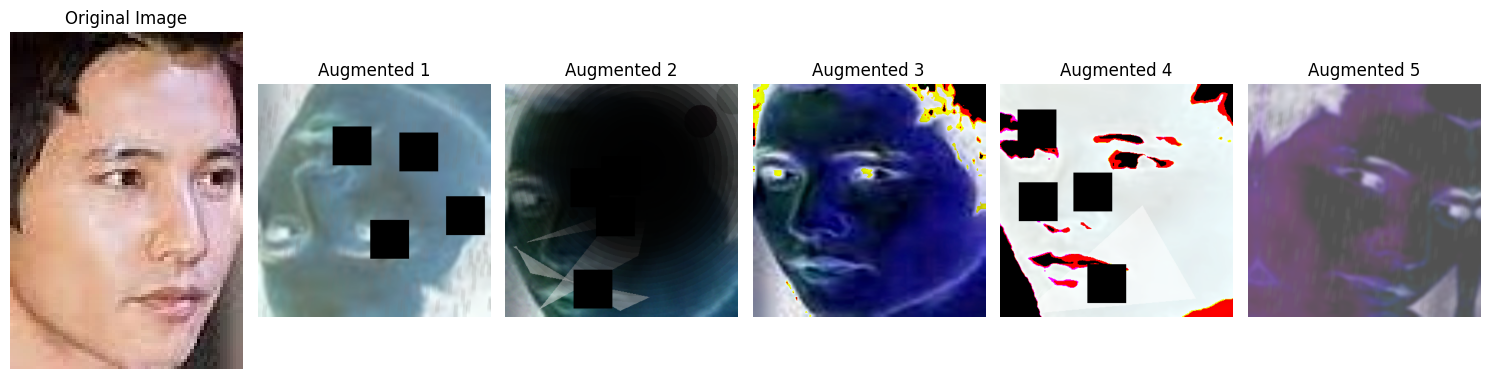

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


# 데이터 증강 시각화 함수
def visualize_augmentation(transform, img_path, num_samples=5):
    """
    Visualize the original image alongside augmented samples.

    :param transform: AlbumentationsTransform instance
    :param img_path: Path to the image file
    :param num_samples: Number of augmented samples to display
    """
    # Load the original image
    original_img = Image.open(img_path).convert("RGB")
    original_np = np.array(original_img)

    fig, axes = plt.subplots(1, num_samples + 1, figsize=(15, 5))
    axes[0].imshow(original_np)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Generate augmented samples
    for i in range(num_samples):
        augmented_img = transform(original_img)
        augmented_np = augmented_img.permute(
            1, 2, 0
        ).numpy()  # Convert tensor to numpy array (HWC format)
        augmented_np = np.clip(augmented_np * 255, 0, 255).astype(
            np.uint8
        )  # Rescale to 0-255

        axes[i + 1].imshow(augmented_np)
        axes[i + 1].set_title(f"Augmented {i + 1}")
        axes[i + 1].axis("off")

    plt.tight_layout()
    plt.show()


# 경로 설정 (원하는 이미지 경로로 변경)
example_image_path = r"data\face_detected_images\AC_cleaned_6000\images(96).jpg"

# AlbumentationsTransform 인스턴스 생성
albumentations_transform = AlbumentationsTransform()

# 증강 시각화
visualize_augmentation(albumentations_transform, example_image_path, num_samples=5)

In [2]:
import pandas as pd

df = pd.read_parquet(r"C:\Users\honjo\profile_level_prediction\data\users.parquet")
df

id alpha_code sex  approval profile_level profile_rank  \
0         472049         KR   M         2             D         None   
1         338396         KR   F         1             D            D   
2         273461         KR   M         1             D            D   
3         469644         KR   F         2             D         None   
4         767486         KR   M         1             D            D   
...          ...        ...  ..       ...           ...          ...   
1838477   431269         KR   M         1             C            C   
1838478   422295         KR   M         1             C         None   
1838479   422915         KR   M         1             C            C   
1838480   422728         KR   M         1             C            C   
1838481  1621995         KR   F         1             C         None   

                                                     image  \
0        https://storage.googleapis.com/connecting-2081...   
1        https://storage.googleapis.com/connecting-2081...   
2        https://storage.googleapis.com/connecting-2081...   
3        https://storage.googleapis.com/connecting-2081...   
4        https://storage.googleapis.com/connecting-2081...   
...                                                    ...   
1838477  https://storage.googleapis.com/connecting-2081...   
1838478  https://storage.googleapis.com/connecting-2081...   
1838479  https://storage.googleapis.com/connecting-2081...   
1838480  https://storage.googleapis.com/connecting-2081...   
1838481  https://storage.googleapis.com/connecting-2081...   

                         date_joined              image_host  \
0        2020-08-03 03:07:15.326 UTC  storage.googleapis.com   
1        2020-04-13 11:54:51.313 UTC  storage.googleapis.com   
2        2020-03-05 02:55:30.487 UTC  storage.googleapis.com   
3        2020-08-01 08:45:47.599 UTC  storage.googleapis.com   
4        2021-02-18 13:20:01.716 UTC  storage.googleapis.com   
...                              ...                     ...   
1838477   2020-06-28 14:41:41.84 UTC  storage.googleapis.com   
1838478  2020-06-18 03:56:35.821 UTC  storage.googleapis.com   
1838479  2020-06-18 17:17:36.532 UTC  storage.googleapis.com   
1838480  2020-06-18 14:45:52.234 UTC  storage.googleapis.com   
1838481  2022-06-05 11:37:45.765 UTC  storage.googleapis.com   

                                                image_path  is_invalid  \
0        connecting-208115.appspot.com/profileImage/202...        True   
1        connecting-208115.appspot.com/profileImage/202...        True   
2        connecting-208115.appspot.com/profileImage/202...        True   
3        connecting-208115.appspot.com/profileImage/202...        True   
4        connecting-208115.appspot.com/profileImage/202...        True   
...                                                    ...         ...   
1838477  connecting-208115.appspot.com/profileImage/202...        True   
1838478  connecting-208115.appspot.com/profileImage/202...        True   
1838479  connecting-208115.appspot.com/profileImage/202...        True   
1838480  connecting-208115.appspot.com/profileImage/202...        True   
1838481  connecting-208115.appspot.com/profileImage/202...        True   

                                          valid_image_path  \
0        profileImage/2020-08-03/2020-08-03%2012%3A07%3...   
1        profileImage/2020-07-11/2020-07-11%2019%3A11%3...   
2        profileImage/2020-03-05/2020-03-05%2012%3A00%3...   
3        profileImage/2020-08-02/2020-08-02%2003%3A20%3...   
4        profileImage/2021-02-18/2021-02-18%2022%3A19%3...   
...                                                    ...   
1838477  profileImage/2020-06-28/2020-06-28%2023%3A41%3...   
1838478  profileImage/2020-06-18/2020-06-18%2012%3A56%3...   
1838479  profileImage/2020-06-19/2020-06-19%2002%3A17%3...   
1838480  profileImage/2020-06-18/2020-06-18%2023%3A45%3...   
1838481  profileImage/2022-06-05/2022-06-05%2020%3A37%3...   

 

In [53]:
import os
import pandas as pd

# 1. 파일명 추출
df["filename"] = df["local_image"].apply(lambda x: x.split("/")[-1])

# 2. 두 디렉토리의 파일 리스트 가져오기
directory1 = r"data\normal_images_cleaned\A"
files_in_directory1 = set(os.listdir(directory1))

# 3. 교집합 파일 추출
common_files = df[df["filename"].isin(files_in_directory1)]

# 4. 'sex' 칼럼의 개수 확인
sex_counts = common_files["sex"].value_counts()

# 결과 출력
print(sex_counts)
common_files

sex
F    1478
M     926
Name: count, dtype: int64


id alpha_code sex  approval profile_level profile_rank  \
248        71639         KR   M         1             D            D   
555       505172         KR   F         2             D         None   
603       353982         KR   M         0             D            D   
6638      484689         KR   M         2          None         None   
11080     457302         KR   M         2          None         None   
...          ...        ...  ..       ...           ...          ...   
1770585  1633172         KR   F         1             C         None   
1774169   429982         KR   F         2             C         None   
1812523  1737430         KR   F         1             C         None   
1832878  1845494         KR   F         1             C         None   
1837379  2017124         KR   M         1             C         None   

                                                     image  \
248      https://storage.googleapis.com/connecting-2081...   
555      https://storage.googleapis.com/connecting-2081...   
603      https://storage.googleapis.com/connecting-2081...   
6638     https://storage.googleapis.com/connecting-2081...   
11080    https://storage.googleapis.com/connecting-2081...   
...                                                    ...   
1770585  https://google-storage.yplabs.net/profileImage...   
1774169  https://storage.googleapis.com/connecting-2081...   
1812523  https://storage.googleapis.com/connecting-2081...   
1832878  https://google-storage.yplabs.net/profileImage...   
1837379  https://google-storage.yplabs.net/profileImage...   

                         date_joined                 image_host  \
248      2019-07-30 07:00:04.525 UTC     storage.googleapis.com   
555      2020-09-02 16:25:40.028 UTC     storage.googleapis.com   
603       2020-04-23 18:09:49.02 UTC     storage.googleapis.com   
6638     2020-08-15 08:26:28.312 UTC     storage.googleapis.com   
11080    2020-07-21 07:40:11.192 UTC     storage.googleapis.com   
...                              ...                        ...   
1770585  2022-06-27 10:24:26.468 UTC  google-storage.yplabs.net   
1774169  2020-06-27 09:56:54.176 UTC     storage.googleapis.com   
1812523  2022-12-27 16:33:59.964 UTC     storage.googleapis.com   
1832878  2023-05-02 18:21:37.685 UTC  google-storage.yplabs.net   
1837379  2023-10-15 08:07:27.325 UTC  google-storage.yplabs.net   

                                                image_path  is_invalid  \
248      connecting-208115.appspot.com/profileImage/202...        True   
555      connecting-208115.appspot.com/profileImage/202...        True   
603      connecting-208115.appspot.com/profileImage/202...        True   
6638     connecting-208115.appspot.com/profileImage/202...        True   
11080    connecting-208115.appspot.com/profileImage/202...        True   
...                                                    ...         ...   
1770585  profileImage/2024-07-09/2024-07-09%2010%3A11%3...       False   
1774169  connecting-208115.appspot.com/profileImage/202...        True   
1812523  connecting-208115.appspot.com/profileImage/202...        True   
1832878  profileImage/2023-05-03/2023-05-03%2003%3A24%3...       False   
1837379  profileImage/2024-03-04/2024-03-04%2002%3A52%3...       False   

                                          valid_image_path  \
248      profileImage/2020-05-16/2020-05-16%2012%3A40%3...   
555      profileImage/2020-09-03/2020-09-03%2001%3A25%3...   
603      profileImage/2020-04-24/2020-04-24%2003%3A09%3...   
6638     profileImage/2020-08-15/2020-08-15%2017%3A26%3...   
11080    profileImage/2020-07-21/2020-07-21%2016%3A40%3...   
...                                                    ...   
1770585  profileImage/2024-07-09/2024-07-09%2010%3A11%3...   
1774169  profileImage/2020-06-27/2020-06-27%2018%3A56%3...   
1812523  profileImage/2022-12-28/2022-12-28%2001%3A33%3...   
1832878  profileImage/2023-05-03/2023-05-03%2003%3A24%3...   
1837379  profileImage/2024-0

In [112]:
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold

# 1. 성별 정보 데이터 로드
user_data = pd.read_parquet(
    r"C:\Users\honjo\profile_level_prediction\data\users.parquet"
)

# 2. 폴드 및 출력 경로 설정
output_directory = "data/5_fold_2class_AC_cleaned_sex/"
os.makedirs(output_directory, exist_ok=True)

directory_c = r"data/normal_images_cleaned/C"
directory_a = r"data/normal_images_cleaned/A"

files_in_directory_c = set(os.listdir(directory_c))
files_in_directory_a = set(os.listdir(directory_a))

# 3. 파일명과 성별 매핑 준비
user_data["filename"] = user_data["local_image"].apply(lambda x: os.path.basename(x))


# 4. Train 및 Valid를 합친 후 처리
def process_combined_folds():
    for sex in ["M", "F"]:  # M: 남성, F: 여성
        sex_directory = os.path.join(output_directory, sex)
        os.makedirs(sex_directory, exist_ok=True)

        # 데이터 준비
        all_data = pd.DataFrame()

        for path in train_fold_paths + valid_fold_paths:
            fold_data = pd.read_csv(path)
            fold_data["filename"] = fold_data["local_image"].apply(
                lambda x: os.path.basename(x)
            )
            fold_data = fold_data.merge(
                user_data[["filename", "sex"]], on="filename", how="left"
            )

            # "images" 또는 "download"가 포함된 경우 강제로 남성으로 설정
            additional_data = fold_data[
                fold_data["filename"].str.contains(
                    "images|download", case=False, na=False
                )
            ]
            additional_data["sex"] = "M"  # 강제로 남성으로 설정
            fold_data = pd.concat([fold_data, additional_data], ignore_index=True)

            # 성별 필터링
            fold_data = fold_data[fold_data["sex"] == sex]
            all_data = pd.concat([all_data, fold_data], ignore_index=True)

        # 중복 제거 및 셔플
        all_data = all_data.drop_duplicates().reset_index(drop=True)
        all_data = shuffle(all_data, random_state=42)

        # C와 A 디렉토리 교집합 추출
        c_files = all_data[all_data["filename"].isin(files_in_directory_c)]
        a_files = all_data[all_data["filename"].isin(files_in_directory_a)]

        # 샘플링
        c_files = c_files.sample(n=min(len(c_files), 7000), random_state=42)
        a_files = a_files.sample(n=min(len(a_files), 7000), random_state=42)

        # Train/Valid 나누기
        combined_data = pd.concat([c_files, a_files])
        combined_data = shuffle(combined_data, random_state=42)

        # Stratified K-Fold 생성
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        X = combined_data
        y = combined_data["group"]  # 그룹 기반 분할

        fold_index = 1
        for train_idx, valid_idx in skf.split(X, y):
            train_data = combined_data.iloc[train_idx]
            valid_data = combined_data.iloc[valid_idx]

            # 필요한 열 추가
            train_data = train_data[
                ["local_image", "cs_rank", "face", "new_image_path", "group"]
            ]
            train_data["sex"] = sex
            valid_data = valid_data[
                ["local_image", "cs_rank", "face", "new_image_path", "group"]
            ]
            valid_data["sex"] = sex

            # 파일 저장
            train_output_path = os.path.join(
                sex_directory, f"train_fold_{fold_index}.csv"
            )
            valid_output_path = os.path.join(
                sex_directory, f"valid_fold_{fold_index}.csv"
            )

            train_data.to_csv(train_output_path, index=False)
            valid_data.to_csv(valid_output_path, index=False)

            print(f"{sex} Train Fold {fold_index} 저장 완료: {train_output_path}")
            print(f"{sex} Valid Fold {fold_index} 저장 완료: {valid_output_path}")

            fold_index += 1


# 실행
train_fold_paths = ["data/5_fold_2class_AC_cleaned_6000/train_fold_1.csv"]
valid_fold_paths = ["data/5_fold_2class_AC_cleaned_6000/valid_fold_1.csv"]

process_combined_folds()

C:\Users\honjo\AppData\Local\Temp\ipykernel_16736\3114964088.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_data['sex'] = 'M'  # 강제로 남성으로 설정
C:\Users\honjo\AppData\Local\Temp\ipykernel_16736\3114964088.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_data['sex'] = 'M'  # 강제로 남성으로 설정


M Train Fold 1 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\train_fold_1.csv
M Valid Fold 1 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\valid_fold_1.csv
M Train Fold 2 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\train_fold_2.csv
M Valid Fold 2 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\valid_fold_2.csv
M Train Fold 3 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\train_fold_3.csv
M Valid Fold 3 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\valid_fold_3.csv
M Train Fold 4 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\train_fold_4.csv
M Valid Fold 4 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\valid_fold_4.csv
M Train Fold 5 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\train_fold_5.csv
M Valid Fold 5 저장 완료: data/5_fold_2class_AC_cleaned_sex/M\valid_fold_5.csv


C:\Users\honjo\AppData\Local\Temp\ipykernel_16736\3114964088.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_data['sex'] = 'M'  # 강제로 남성으로 설정


F Train Fold 1 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\train_fold_1.csv
F Valid Fold 1 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\valid_fold_1.csv
F Train Fold 2 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\train_fold_2.csv
F Valid Fold 2 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\valid_fold_2.csv
F Train Fold 3 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\train_fold_3.csv
F Valid Fold 3 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\valid_fold_3.csv
F Train Fold 4 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\train_fold_4.csv
F Valid Fold 4 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\valid_fold_4.csv
F Train Fold 5 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\train_fold_5.csv
F Valid Fold 5 저장 완료: data/5_fold_2class_AC_cleaned_sex/F\valid_fold_5.csv


C:\Users\honjo\AppData\Local\Temp\ipykernel_16736\3114964088.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_data['sex'] = 'M'  # 강제로 남성으로 설정


In [108]:
import pandas as pd

df = pd.read_csv("data/5_fold_2class_AC_cleaned_sex/M/train_fold_1.csv")
df["cs_rank"].value_counts()

cs_rank
C    1257
A    1111
Name: count, dtype: int64

In [109]:
df = pd.read_csv("data/5_fold_2class_AC_cleaned_sex/M/valid_fold_1.csv")
df["cs_rank"].value_counts()

cs_rank
C    315
A    278
Name: count, dtype: int64

CSV 파일 로드 완료. 총 이미지 수: 2368
이미지 파일 경로 예시:
0    C:/Users/honjo/profile_level_prediction/data/n...
1    C:/Users/honjo/profile_level_prediction/data/n...
2    C:/Users/honjo/profile_level_prediction/data/n...
3    C:/Users/honjo/profile_level_prediction/data/n...
4    C:/Users/honjo/profile_level_prediction/data/n...
Name: local_image, dtype: object


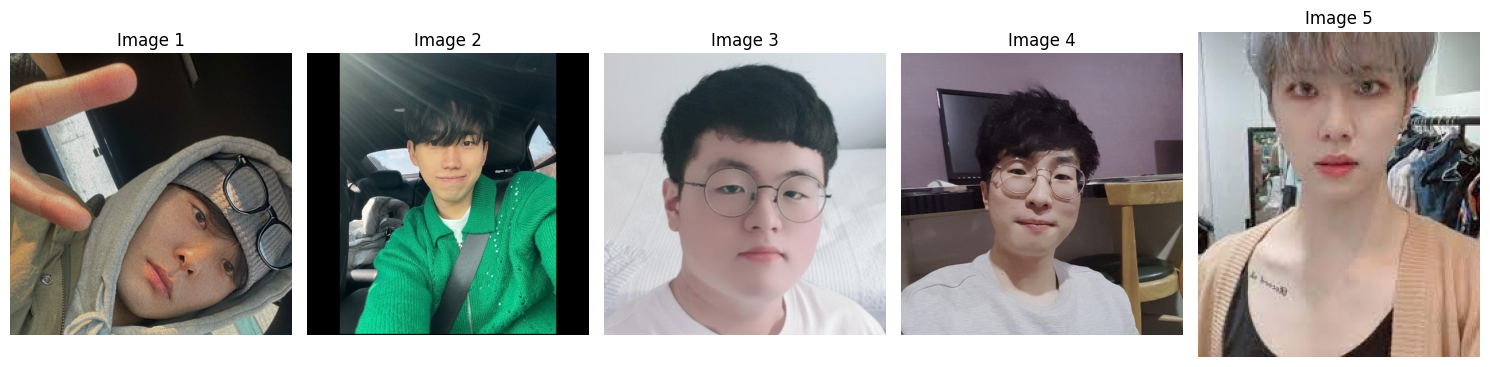

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# CSV 파일 로드
csv_path = r"data/5_fold_2class_AC_cleaned_sex/M/train_fold_1.csv"
data = pd.read_csv(csv_path)

# 이미지 열 확인
print(f"CSV 파일 로드 완료. 총 이미지 수: {len(data)}")
print("이미지 파일 경로 예시:")
print(data["local_image"].head())


# 이미지 확인 함수
def display_images(image_paths, num_images=5):
    """
    주어진 이미지 경로에서 이미지 데이터를 읽고 시각화
    Args:
        image_paths (list): 이미지 파일 경로 리스트
        num_images (int): 표시할 이미지 개수
    """
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(image_paths[:num_images]):
        if os.path.exists(img_path):  # 경로가 유효한 경우
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"Image {i + 1}")
        else:
            print(f"이미지 경로가 유효하지 않습니다: {img_path}")
    plt.tight_layout()
    plt.show()


# 이미지 경로 리스트
image_paths = data["local_image"].tolist()

# 이미지 표시
display_images(image_paths, num_images=5)  # 최대 5개 이미지 표시